<a href="https://colab.research.google.com/github/FariaJahan63/BreasrCancerClassification/blob/master/thesis(breast_cancer_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
data=pd.read_csv("/content/breast-cancer.csv")
data.shape


(569, 32)

In [ ]:
data.drop(columns=['id'], inplace=True)

data.shape

(569, 31)

In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
data.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


# Handling outliers by IQR method

In [ ]:
print("data shape Before handling outliers: ", data.shape)

# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Function to remove outliers from specified columns
def remove_outliers(data, columns):
    cleaned_data = data.copy()
    for column in columns:
        if column in cleaned_data.select_dtypes(include=[np.number]).columns:
            cleaned_data = remove_outliers_iqr(cleaned_data, column)
    return cleaned_data

# Remove outliers from the 'texture_mean' variable
variables_to_handle = ['texture_mean']
data = remove_outliers(data, variables_to_handle)

print("data shape after handling outliers: ", data.shape)

data shape Before handling outliers:  (569, 31)
data shape after handling outliers:  (562, 31)


# Encoding (we opted for label encoding due to its simplicity, with 'B' values represented as 0 and 'M' as 1)

In [ ]:
# Apply label encoding to the 'diagnosis' column
!pip install scikit-learn # Install scikit-learn if you haven't already
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

label_encoder = LabelEncoder()

data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Print the classes and the first few rows of the encoded column
print(f"Classes for 'diagnosis': {label_encoder.classes_}")
# print(data['diagnosis'].head())

# Display the first few rows of the updated dataframe
data.head()

Classes for 'diagnosis': ['B' 'M']


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


** Decision Tree**

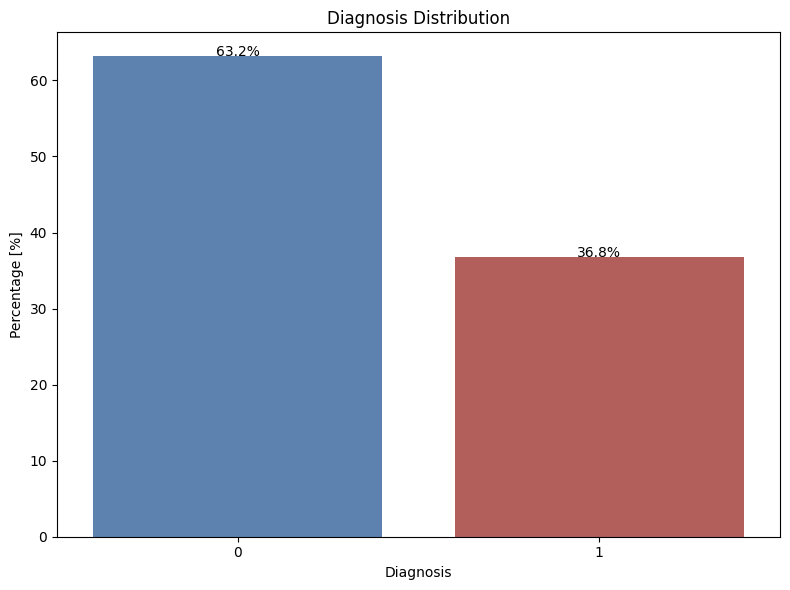

In [ ]:
# Calculate counts and percentages of each category
diagnosis_counts = data['diagnosis'].value_counts()
diagnosis_percentage = (diagnosis_counts / diagnosis_counts.sum()) * 100

# Create DataFrame from counts and percentages
diagnosis_distribution = pd.DataFrame({'Diagnosis': diagnosis_counts.index, 'Count': diagnosis_counts.values,
                                       'Percentage': diagnosis_percentage.values})

# Custom colors for the bar chart
custom_colors = {"M": "#4F81BD", "B": "#C0504D"}

# Plotting the distribution
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='Diagnosis', y='Percentage', data=diagnosis_distribution, palette=custom_colors.values())
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Percentage [%]')

# Add text labels with percentages on top of each bar
for index, row in diagnosis_distribution.iterrows():
    bar_plot.text(row.name, row['Percentage'], f"{row['Percentage']:.1f}%", color='black', ha="center")

plt.tight_layout()
plt.show(block=False)

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Assuming 'data' is already defined and contains your dataset

# Define features (all columns except 'Diagnosis')
X = data.drop('diagnosis', axis=1)

# Define target variable
y = pd.DataFrame(data['diagnosis'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Initialize the DecisionTreeClassifier
cls = DecisionTreeClassifier(random_state=1)

# Fit the model to the training data
cls.fit(X_train, y_train)  # Make sure this line is executed before making predictions

# Make predictions on the test set
y_pred = cls.predict(X_test)


In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

X_train dimension=  (449, 30)
X_test dimension=  (113, 30)
y_train dimension=  (449, 1)
y_test dimension=  (113, 1)


In [ ]:
# Choose some random indices from the test set
random_indices = np.random.choice(len(X_test), 5, replace=False)

# Print the actual and predicted labels for the randomly selected samples
for index in random_indices:
    predicted_label = y_pred[index]  # Predict label for the sample
    actual_label = y_test.iloc[index].item()   # Get the actual label
    print("Sample {}: Actual label: {}, Predicted label: {}".format(index, actual_label, predicted_label))

print("Accuracy:", cls.score(X_test, y_test))

Sample 67: Actual label: 0, Predicted label: 0
Sample 3: Actual label: 1, Predicted label: 1
Sample 105: Actual label: 0, Predicted label: 0
Sample 26: Actual label: 0, Predicted label: 0
Sample 104: Actual label: 0, Predicted label: 0
Accuracy: 0.9557522123893806


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for DecisionTree :')
print(conf_matrix)

print("__"*50 )

print("num of True Positive :",conf_matrix[1][1])
print("num of True Negative :",conf_matrix[0][0])
print("num of False Positive :",conf_matrix[0][1])
print("num of False Negative :",conf_matrix[1][0])

Confusion Matrix for DecisionTree :
[[69  2]
 [ 3 39]]
____________________________________________________________________________________________________
num of True Positive : 39
num of True Negative : 69
num of False Positive : 2
num of False Negative : 3


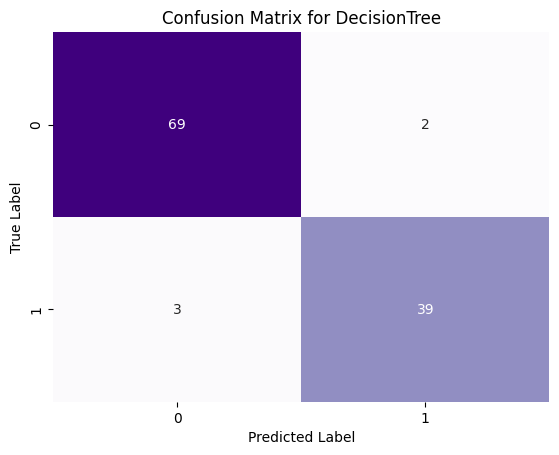

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix for DecisionTree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, matthews_corrcoef # Import necessary functions

# Calculate recall, precision, F1-score, and MCC
report = classification_report(y_test, y_pred, target_names=['B', 'M'])
mcc = matthews_corrcoef(y_test, y_pred)

# Print the classification report and MCC
print("Classification Report:\n", report)
print("MCC:", mcc)

Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.97      0.97        71
           M       0.95      0.93      0.94        42

    accuracy                           0.96       113
   macro avg       0.95      0.95      0.95       113
weighted avg       0.96      0.96      0.96       113

MCC: 0.904966064677163


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Initialize the classifier
cls = DecisionTreeClassifier(random_state=1)

# Perform 5-fold cross-validation
scores = cross_val_score(cls, X, y, cv=5)  # X and y are your feature and target data respectively

# Print the scores for each fold
print("Cross-validation scores:", scores)

# Print the average score across all folds
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.90265487 0.90265487 0.91964286 0.94642857 0.86607143]
Average cross-validation score: 0.9074905183312263


In [ ]:
from imblearn.metrics import geometric_mean_score

# Assuming 'y_test' and 'y_pred' are already defined for your Decision Tree classifier
gmean_dt = geometric_mean_score(y_test, y_pred)
print("G-mean for Decision Tree:", gmean_dt)

G-mean for Decision Tree: 0.9499549920504282


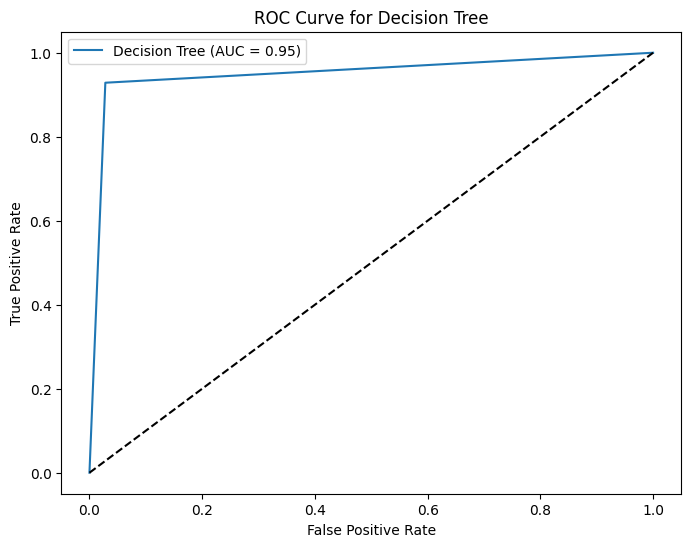

AUC for Decision Tree: 0.9502012072434608


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming 'data' is already defined and contains your dataset after handling outliers

# Define features (all columns except 'diagnosis')
X = data.drop('diagnosis', axis=1)

# Define target variable
y = pd.DataFrame(data['diagnosis'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Initialize the DecisionTreeClassifier
cls = DecisionTreeClassifier(random_state=1)

# Fit the model to the training data
cls.fit(X_train, y_train)

# Obtain predicted probabilities for the positive class
y_pred_proba_dt = cls.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()

print("AUC for Decision Tree:", auc_dt)

**NAIVE BAYES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
data.diagnosis=data.diagnosis.replace({"M": 0 ,"B":1})# Malligant =0  Benign=1
y=data.diagnosis.values
X=data.drop(columns=["diagnosis"],axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=17,shuffle=True,stratify=y)

In [ ]:
NB = GaussianNB()
NB.fit(train_X, train_y)
predictions=NB.predict(test_X)
print("Accuracy Score :",accuracy_score(test_y,predictions))
print("Classification Report \n",classification_report(test_y,predictions))


Accuracy Score : 0.911504424778761
Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93        71
           1       0.94      0.81      0.87        42

    accuracy                           0.91       113
   macro avg       0.92      0.89      0.90       113
weighted avg       0.91      0.91      0.91       113



In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes classifier
model = GaussianNB()

# Initialize 5-fold Stratified Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold cross-validation and obtain accuracy scores
accuracy_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

# Print cross-validation scores
print('Cross-validation scores:', accuracy_scores)
print('Mean accuracy:', accuracy_scores.mean())

Cross-validation scores: [0.95555556 0.95555556 0.88888889 0.92222222 0.94382022]
Mean accuracy: 0.9332084893882646


In [ ]:
from imblearn.metrics import geometric_mean_score

# Assuming 'test_y' and 'predictions' are defined from your Naive Bayes model trained on the outlier-handled data
gmean_nb = geometric_mean_score(test_y, predictions)
print("G-mean for Naive Bayes :", gmean_nb)

G-mean for Naive Bayes : 0.8869725598526651


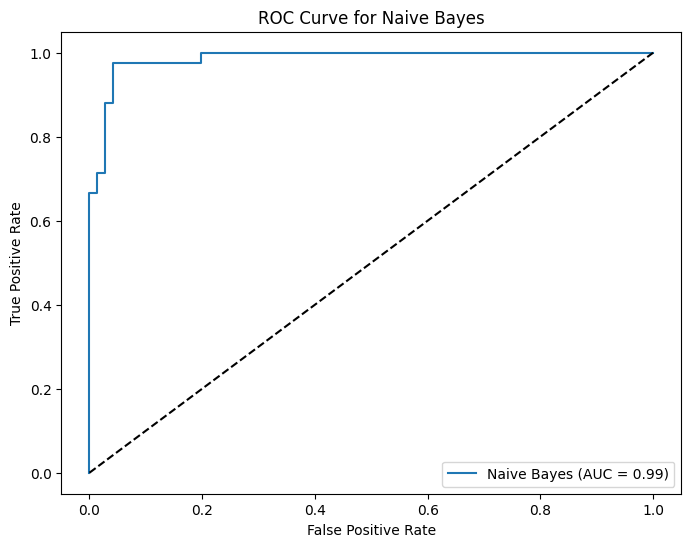

AUC for Naive Bayes: 0.9859154929577465


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming 'data' is your DataFrame containing the breast cancer dataset after handling outliers

# Prepare the data
data.diagnosis = data.diagnosis.replace({"M": 0, "B": 1})  # Malignant = 0, Benign = 1
y = data.diagnosis.values
X = data.drop(columns=["diagnosis"], axis=1)

# Split the data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=17, shuffle=True, stratify=y)

# Train the Naive Bayes model
NB = GaussianNB()
NB.fit(train_X, train_y)

# Get predicted probabilities for the positive class
y_pred_proba_nb = NB.predict_proba(test_X)[:, 1]

# Calculate ROC curve and AUC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(test_y, y_pred_proba_nb)
auc_nb = roc_auc_score(test_y, y_pred_proba_nb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend()
plt.show()

print("AUC for Naive Bayes:", auc_nb)

**SVM**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data
data = pd.read_csv("/content/breast-cancer.csv")
data.drop(columns=['id'], inplace=True)

# Handle Outliers
def remove_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

def remove_outliers(data, columns):
    cleaned_data = data.copy()
    for column in columns:
        if column in cleaned_data.select_dtypes(include=[np.number]).columns:
            cleaned_data = remove_outliers_iqr(cleaned_data, column)
    return cleaned_data

variables_to_handle = data.columns[:-1]
data = remove_outliers(data, variables_to_handle)

# Encode the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Extract features and target variable
X = data.drop('diagnosis', axis=1).values
y = data['diagnosis'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Perform 5-fold cross-validation on the training set
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svm, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))

Accuracy: 0.9649122807017544
Confusion Matrix:
 [[53  2]
 [ 0  2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        55
           1       0.50      1.00      0.67         2

    accuracy                           0.96        57
   macro avg       0.75      0.98      0.82        57
weighted avg       0.98      0.96      0.97        57

Cross-validation scores: [0.93333333 0.95555556 0.95555556 0.95555556 0.93333333]
Average cross-validation score: 0.9466666666666667


In [ ]:
from sklearn.svm import SVC
from imblearn.metrics import geometric_mean_score

# Assuming 'X_train_scaled', 'y_train', 'X_test_scaled', and 'y_test' are already defined
svm = SVC(kernel='linear')  # Initialize SVM with a linear kernel, you can choose other kernels as well
svm.fit(X_train_scaled, y_train)  # Train the SVM model

y_pred_svm = svm.predict(X_test_scaled)  # Predict on the test set

gmean_svm = geometric_mean_score(y_test, y_pred_svm)  # Calculate G-mean
print("G-mean for SVM:", gmean_svm)

G-mean for SVM: 0.9816498172140428


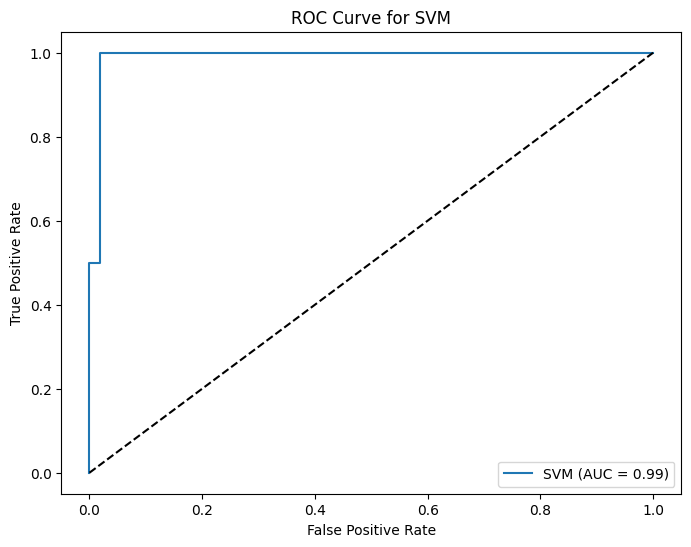

AUC for SVM: 0.9909090909090909


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the breast cancer dataset after handling outliers

# Encode the target variable (if not already done)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Extract features and target variable
X = data.drop('diagnosis', axis=1).values
y = data['diagnosis'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model
svm = SVC(kernel='linear', probability=True, random_state=42)  # Note: probability=True is added
svm.fit(X_train_scaled, y_train)

# Get predicted probabilities for the positive class
y_pred_proba_svm = svm.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)
auc_svm = roc_auc_score(y_test, y_pred_proba_svm)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()
plt.show()

print("AUC for SVM:", auc_svm)

**ANN**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# Load the data (assuming it's already in a DataFrame called 'data')
# If not, load it using pd.read_csv()

# Handle Outliers (using IQR method as in your provided code)
def remove_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

def remove_outliers(data, columns):
    cleaned_data = data.copy()
    for column in columns:
        if column in cleaned_data.select_dtypes(include=[np.number]).columns:
            cleaned_data = remove_outliers_iqr(cleaned_data, column)
    return cleaned_data

variables_to_handle = ['texture_mean']  # Add other relevant columns if needed
data = remove_outliers(data, variables_to_handle)

# Encode 'diagnosis' column (assuming it's categorical)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Split data into features (X) and target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Artificial Neural Network classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(mlp, X_train, y_train, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

Confusion Matrix:
 [[49  1]
 [ 2  2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        50
           1       0.67      0.50      0.57         4

    accuracy                           0.94        54
   macro avg       0.81      0.74      0.77        54
weighted avg       0.94      0.94      0.94        54


Accuracy: 0.9444444444444444

Cross-Validation Scores: [0.97727273 1.         0.93023256 0.93023256 0.95348837]
Average Cross-Validation Score: 0.9582452431289641


In [ ]:
import tensorflow as tf
from tensorflow import keras
from imblearn.metrics import geometric_mean_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data (assuming it's in a CSV file)
data = pd.read_csv("/content/breast-cancer.csv")
data.drop(columns=['id'], inplace=True)

# Handle Outliers (using IQR method)
def remove_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

def remove_outliers(data, columns):
    cleaned_data = data.copy()
    for column in columns:
        if column in cleaned_data.select_dtypes(include=[np.number]).columns:
            cleaned_data = remove_outliers_iqr(cleaned_data, column)
    return cleaned_data

variables_to_handle = data.columns[:-1]
data = remove_outliers(data, variables_to_handle)

print("Shape of data after outlier removal:", data.shape)  # Check shape

# Encode the target variable
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Extract features and target variable
X = data.drop('diagnosis', axis=1).values
y = data['diagnosis'].values

print("Shape of X after encoding:", X.shape)  # Check shape
print("Shape of y after encoding:", y.shape)  # Check shape

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train_scaled:", X_train_scaled.shape)  # Check shape
print("Shape of y_train:", y_train.shape)  # Check shape

# Encode the target variables for the ANN
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print("Shape of X_train_scaled after encoding:", X_train_scaled.shape)  # Check shape
print("Shape of y_train_encoded after encoding:", y_train_encoded.shape)  # Check shape

# Define the ANN model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the encoded target variable
model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=32)

# Predict probabilities on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred_ann = (y_pred_proba > 0.5).astype(int)

# Calculate G-mean using the encoded test labels
gmean_ann = geometric_mean_score(y_test_encoded, y_pred_ann)
print("G-mean for ANN:", gmean_ann)

Shape of data after outlier removal: (282, 31)
Shape of X after encoding: (282, 30)
Shape of y after encoding: (282,)
Shape of X_train_scaled: (225, 30)
Shape of y_train: (225,)
Shape of X_train_scaled after encoding: (225, 30)
Shape of y_train_encoded after encoding: (225,)
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1436 - loss: 0.9666
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5981 - loss: 0.6550  
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8990 - loss: 0.4950 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9181 - loss: 0.3857 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9233 - loss: 0.3011 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9182 - loss: 0.2732 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9299 - loss: 0.2340 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9408 - loss: 0.2006 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

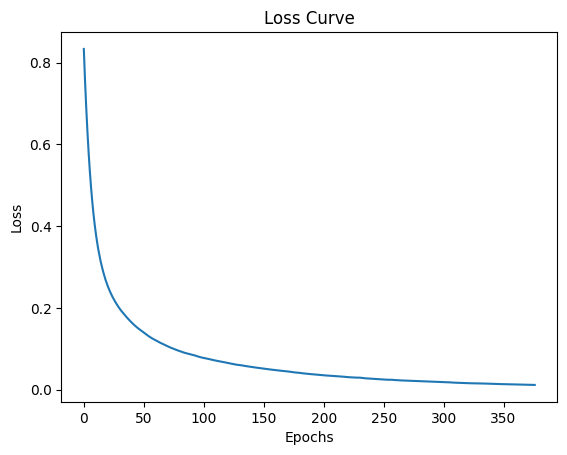

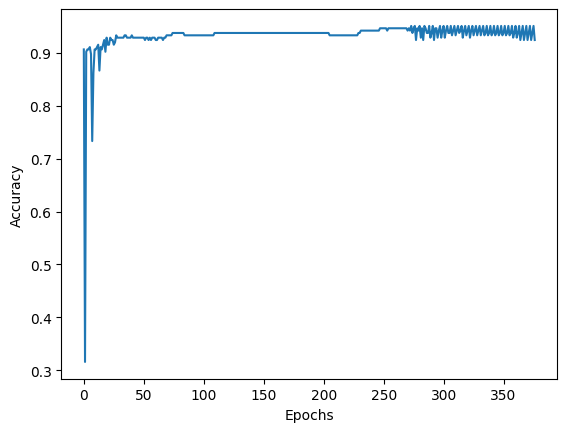

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'mlp' is your trained MLPClassifier model
loss_values = mlp.loss_curve_

# Plot the loss curve
plt.plot(loss_values)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()



from sklearn.metrics import accuracy_score

train_accuracy = []
for epoch in range(mlp.n_iter_):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))  # Train for one epoch
    y_train_pred = mlp.predict(X_train)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))

# Plot the training accuracy curve
plt.plot(train_accuracy)
#plt.title('Training Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9653 - loss: 0.1420 - val_accuracy: 0.9556 - val_loss: 0.1971
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9565 - loss: 0.1451 - val_accuracy: 0.9556 - val_loss: 0.1935
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9521 - loss: 0.1490 - val_accuracy: 0.9556 - val_loss: 0.1899
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9786 - loss: 0.1207 - val_accuracy: 0.9556 - val_loss: 0.1881
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9732 - loss: 0.1265 - val_accuracy: 0.9556 - val_loss: 0.1918
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9716 - loss: 0.1131 - val_accuracy: 0.9556 - val_loss: 0.1921
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9767 - loss: 0.1239 - val_accuracy: 0.9556 - val_loss: 0.1902
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9884 - loss: 0.0947 - val_accuracy: 0.9556 - val_loss: 0.1887
E

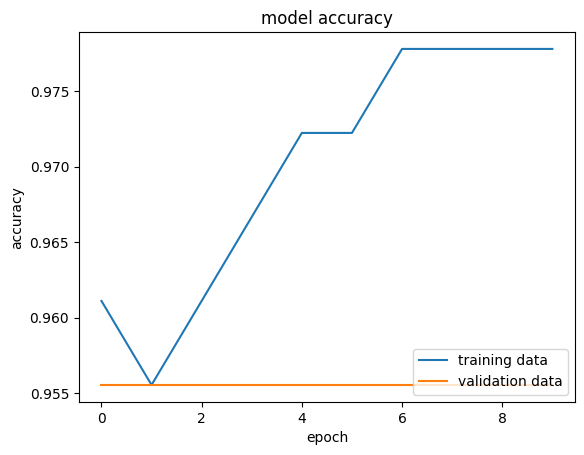

In [ ]:
# Train the model and store the training history
history = model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2) # Added validation_split

# Now you can plot the accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')
plt.show()

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2022 - loss: 0.9351
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6840 - loss: 0.6152 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9590 - loss: 0.4371 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9177 - loss: 0.3635  
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9256 - loss: 0.2821 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9125 - loss: 0.2735 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9408 - loss: 0.2144 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9401 - loss: 0.2018 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9446 - loss: 0.1935 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9589 - loss: 0.1666 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


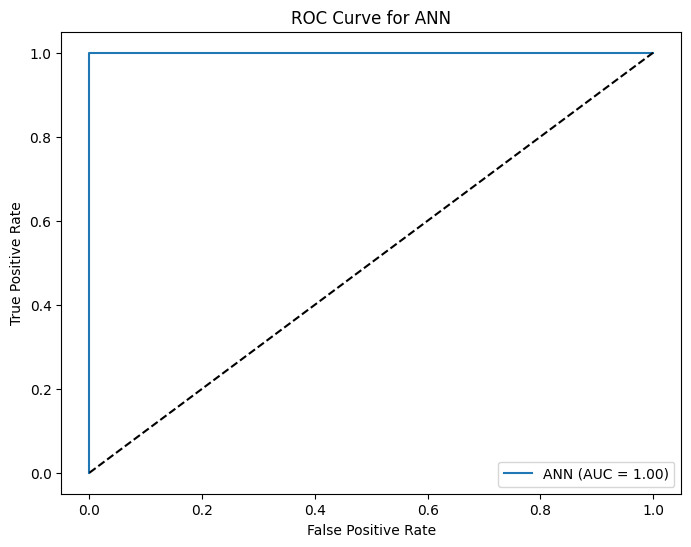

AUC for ANN: 1.0


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the data (assuming it's in a CSV file called 'breast-cancer.csv')
data = pd.read_csv("/content/breast-cancer.csv")
data.drop(columns=['id'], inplace=True)

# Handle Outliers (using IQR method as in your provided code)
def remove_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

def remove_outliers(data, columns):
    cleaned_data = data.copy()
    for column in columns:
        if column in cleaned_data.select_dtypes(include=[np.number]).columns:
            cleaned_data = remove_outliers_iqr(cleaned_data, column)
    return cleaned_data

variables_to_handle = data.columns[:-1]  # Adjust this if you only want to handle outliers for specific columns
data = remove_outliers(data, variables_to_handle)

# Encode the target variable
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Extract features and target variable
X = data.drop('diagnosis', axis=1).values
y = data['diagnosis'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the ANN model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)

# Get predicted probabilities for the positive class
y_pred_proba_ann = model.predict(X_test_scaled)

# Calculate ROC curve and AUC
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_pred_proba_ann)
auc_ann = roc_auc_score(y_test, y_pred_proba_ann)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_ann, tpr_ann, label=f'ANN (AUC = {auc_ann:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ANN')
plt.legend()
plt.show()

print("AUC for ANN:", auc_ann)

# model perfomance

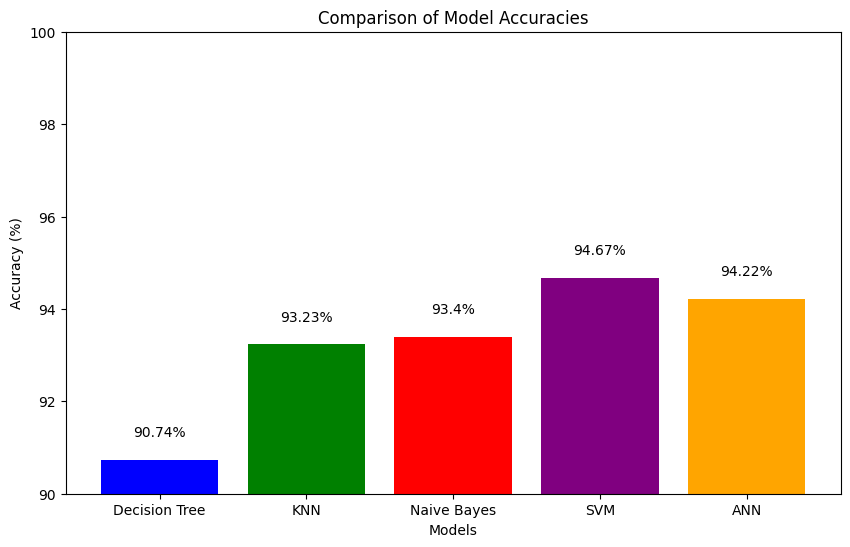

In [ ]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies
models = ['Decision Tree', 'KNN', 'Naive Bayes', 'SVM', 'ANN']
accuracies = [90.74, 93.23, 93.40, 94.67, 94.22]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])

# Adding title and labels
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')

# Displaying the accuracy values on the bars
for i in range(len(accuracies)):
    plt.text(i, accuracies[i] + 0.5, f'{accuracies[i]}%', ha = 'center')

# Show the plot
plt.ylim([90, 100])  # Limit the y-axis to make differences more readable
plt.show()